In [1]:
#!pip install cmake
#!pip install opencv-python
#!conda install -y dlib

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

# 결과물 비교 고찰은 최하단에...

# 작업 이미지 불러오기

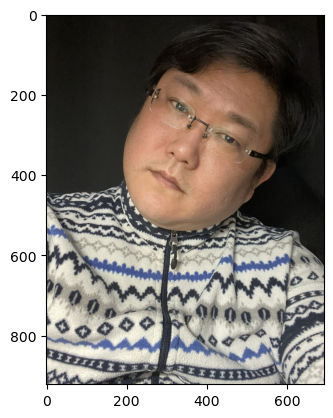

In [3]:
home_dir = os.getenv('HOME')
my_image_path = os.path.join(home_dir, 'work/camera_sticker/images/human10.png')

img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy() # .copy로 최종 결과물을 저장할 객체에 이미지를 복사한다.

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

# (얼굴 검출) \[face Detection] detector_hog()

rectangles[[(161, 162) (546, 547)]]


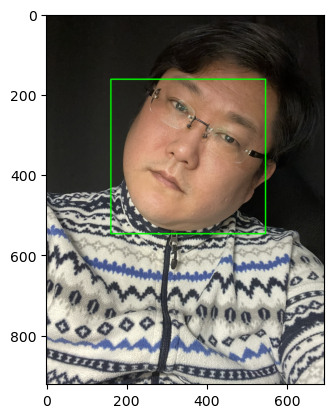

In [4]:
detector_hog = dlib.get_frontal_face_detector() # detector를 선언, 기본 얼굴 감지기

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
# 0 : 업샘플 안 함 → 빠름, 큰 얼굴 위주
# 1 : 1번 업샘플 → 중간 크기 얼굴도 검출
# 2 : 2번 업샘플 → 더 작은 얼굴까지, 많이 느려짐
#
# HOG 검출기는 대략 ~80×80px급 얼굴에 맞추어 학습됨.
# 원본에서 얼굴 height ~50–100px이면 1이 유효,
# ~30–50px처럼 더 작으면 2를 고려.
# 반환되는 dlib.rectangle 좌표는 원본 이미지 기준으로 매핑

print(dlib_rects) # 찾은 얼굴 영역 박스 리스트 (여러 얼굴이 있을 수 있음)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 얼굴 LandMark 추출

In [5]:
model_path = os.path.join(home_dir, 'work/camera_sticker/models/shape_predictor_68_face_landmarks.dat')
# 저장한 landmark 모델의 주소를 model_path 변수에 불러옴

landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

list_landmarks = []    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아내고 좌표를 기록한다.
# points는 dlib.full_object_detection의 객체이므로 parts()함수로 개별 위치에 접근해야 한다.
# 좀 더 직관적인 (x,y)형태로 접근하기 위해 tuple(x,y)로 이루어진 리스트로 변환한다.
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)                 # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))   # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여
                                                                    #  list_points 리스트로 저장
    list_landmarks.append(list_points)                              # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

print("==========")
print(points.parts())
print("==========")
print(list_landmarks)

68
points[(247, 207), (225, 246), (207, 287), (193, 328), (188, 371), (190, 413), (199, 453), (217, 486), (248, 512), (290, 531), (344, 537), (394, 533), (439, 518), (476, 490), (506, 456), (531, 415), (555, 372), (278, 181), (300, 174), (326, 183), (349, 201), (369, 220), (430, 245), (466, 251), (497, 263), (521, 285), (531, 314), (384, 268), (371, 291), (357, 312), (343, 335), (303, 345), (313, 357), (323, 368), (340, 376), (357, 382), (290, 222), (308, 224), (327, 234), (336, 250), (317, 245), (300, 236), (428, 297), (453, 301), (470, 313), (481, 330), (461, 324), (443, 312), (254, 390), (278, 388), (295, 391), (305, 402), (320, 408), (332, 431), (344, 459), (313, 445), (293, 430), (279, 420), (267, 411), (260, 401), (262, 393), (287, 403), (298, 413), (312, 421), (334, 450), (305, 415), (291, 406), (280, 397)]
[[(247, 207), (225, 246), (207, 287), (193, 328), (188, 371), (190, 413), (199, 453), (217, 486), (248, 512), (290, 531), (344, 537), (394, 533), (439, 518), (476, 490), (506

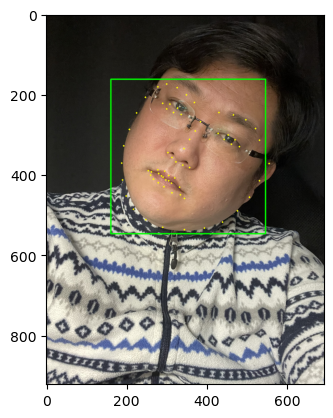

In [6]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 스티커 적용하기

In [7]:
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(순서: (x,y))
# → [[(368, 153), ...(431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # 수염을 붙일 위치
    x = landmark[33][0]  # x값
    y = landmark[33][1]  # y값
    w = h = dlib_rect.width()    # 얼굴 영역의 가로를 차지하는 픽셀의 수
    print (f'(x,y) : ({x},{y})') # x:스티커 중심, y:스티커 중심
    print (f'(w,h) : ({w},{h})') #왕관 스티커 이미지 크기에 쓸 값

(323, 368)
(x,y) : (323,368)
(w,h) : (386,386)


In [8]:
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat.jpg') # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환

## sticker 3차원 회전하기 -Y축, Z축

In [9]:
import math

#================
# 얼굴 회전 각도 찾기
#================

#-----------------
# Y축 회전 각도
#-----------------
# 3-33 간의 거리, 33-13간의 거리 비를 이용한다.
#
# 3-33간의 거리 = 0 ~ 전체 거리
# 회전 = 90~-90
#
# 회전 = (-90-90)/(전체 거리)*x + 90
# 회전 = -180*(3-33간의 거리 / 전체거리)+90
dist3_33 =math.dist(landmark[3],landmark[33])
dist33_13=math.dist(landmark[33],landmark[13])
total_dist=dist3_33+dist33_13
degree_y= int(-180*(dist3_33/total_dist)+90)

#과도한 회전 변환 방지를 위해 회전각도 1/2도 제한
degree_y=degree_y//2
print(f'degree_y: {degree_y}')

#-----------------
#Z축 회전 각도
#-----------------
# 3과 13를 잇는 직선의 기울기를 구한다.
delta_x = landmark[13][0] - landmark[3][0]
delta_y = landmark[13][1] - landmark[3][1]
angle_radians = -np.atan2(delta_y, delta_x)
degree_z = int(np.degrees(angle_radians))
print(f'degree_z: {degree_z}')

degree_y: 8
degree_z: -29


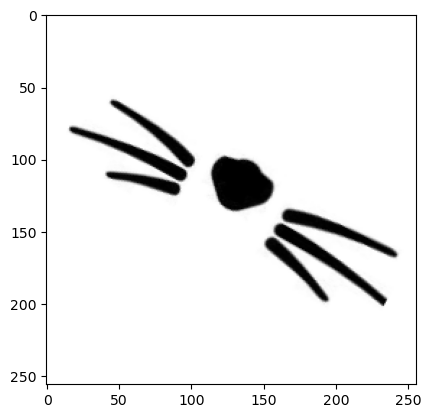

In [10]:
#-----------------
# 스티커 Y축 회전
#-----------------
def rotate_y_keep_center_same_size(img, deg, f=None, bg=255):
    h, w = img.shape[:2]
    cx, cy = w/2.0, h/2.0
    if f is None: f = float(w)

    K = np.array([[f, 0, cx],
                  [0, f, cy],
                  [0, 0,  1]], dtype=np.float32)

    th = np.deg2rad(deg)
    c, s = np.cos(th), np.sin(th)
    R = np.array([[ c, 0,  s],
                  [ 0, 1,  0],
                  [-s, 0,  c]], dtype=np.float32)

    H = K @ R @ np.linalg.inv(K)

    # 중심을 그대로 (cx, cy)에 두도록 평행이동 보정
    p = H @ np.array([cx, cy, 1.0], np.float32)
    px, py = p[0]/p[2], p[1]/p[2]
    T = np.array([[1, 0, cx - px],
                  [0, 1, cy - py],
                  [0, 0,       1]], dtype=np.float32)
    H2 = T @ H

    border = bg if img.ndim == 2 else (bg, bg, bg)
    return cv2.warpPerspective(img, H2, (w, h),
                               flags=cv2.INTER_LINEAR,
                               borderMode=cv2.BORDER_CONSTANT,
                               borderValue=border)

#-----------------
# 스티커 Z축 회전
#-----------------
def rotate_2d_center_same_size(img, deg, scale=1.0, bg=255):
    h, w = img.shape[:2]
    center = (w/2.0, h/2.0)
    M = cv2.getRotationMatrix2D(center, deg, scale)  # +deg = 반시계
    border = bg if img.ndim == 2 else (bg, bg, bg)
    return cv2.warpAffine(img, M, (w, h),
                          flags=cv2.INTER_LINEAR,
                          borderMode=cv2.BORDER_CONSTANT,
                          borderValue=border)

#-----------------
# 스티커 Y축,Z축 회전
#-----------------
out = rotate_y_keep_center_same_size(img_sticker, deg=degree_y)  # 스티커 Y축 회전
out = rotate_2d_center_same_size(out, deg=degree_z)              # 스티커 Z축 회전
img_sticker=out.copy()

plt.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 크기 조정
print (img_sticker.shape)                    # 사이즈를 조정한 스티커 이미지 크기 확인
print (img_sticker[0,0,:])                   # 여백 컬러 확인

# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x: 이미지에서 코 부위의 x값 = 수염 중심
# y: 이미지에서 코 부위의 y값 = 수염 중심
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 수염 width
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 수염 hieght
refined_x = x - (w // 2)
refined_y = y - (h // 2)

(386, 386, 3)
[255 255 255]


In [12]:
#===================================================
# 수염 이미지가 이미지 밖에 위치하지 않도록 조정(Crop)
#===================================================
# img_sticker[:, -refined_x:] 3차원 데이터이지만, 표현 하지 않은 차원은 전체 데이터를 포함한다.
# img_sticker[:, -refined_x:] = img_sticker[:, -refined_x:,:] 같은 표현

# 좌측 boundary 확인
if refined_x < 0:        img_sticker = img_sticker[:, -refined_x:];    refined_x = 0
# 우측 boundary 확인
x_right_bound=(refined_x+w)-img_show.shape[1]
if x_right_bound > 0:    img_sticker = img_sticker[:, :-x_right_bound]
    
# 상단 boundary 확인
if refined_y < 0:        img_sticker = img_sticker[-refined_y:, :];    refined_y = 0
# 하단 boundary 확인
y_bottom_bound=(refined_y+h)-img_show.shape[0]
if y_bottom_bound > 0:   img_sticker = img_sticker[:-y_bottom_bound, :]

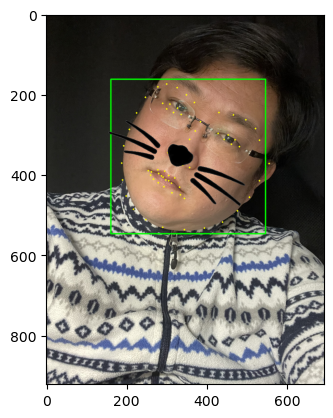

In [13]:
# 원본이미지에서 스티커를 적용할 위치를 crop
# 수염이미지와 1:1 pixel 대응이 되므로
# 수염을 넣을 곳과 원본 이미지 pixel을 살릴 곳을 구분하는데 사용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 수염을 넣을 곳과 원본 이미지 pixel을 살릴 곳을 구분하여 적용
img_show_new=img_show.copy()
img_show_new[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker>100,sticker_area,img_sticker).astype(np.uint8)
# img_sticker>100 으로 비교한 이유는 모든 영역이 0과 255만 존재하지 않고 일부 영역이 이외의 값을 가지므로.

# 결과 출력
# 얼굴 영역과 랜드마크를 미리 적용해놓은 img_show_new에 수염 이미지를 덧붙인 이미지
plt.imshow(cv2.cvtColor(img_show_new, cv2.COLOR_BGR2RGB))
plt.show()

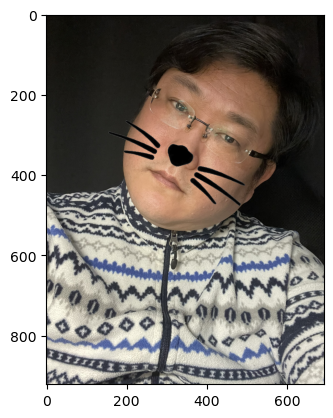

In [14]:
#================================
# 중간 결과가 없는 이미지 결과 출력
#================================
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 수염을 넣을 곳과 원본 이미지 pixel을 살릴 곳을 구분하여 적용
img_bgr_new=img_bgr.copy()
img_bgr_new[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker>100,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr_new, cv2.COLOR_BGR2RGB))
plt.show()

# <결과물 비교 실험 및 고찰>

## I.얼굴 3차원 회전량 계산 (수염 위치 및 3차원 회전량 계산)

<img src="rotationcalc.png">

### 수염 중심 위치 : 33번
왕관을 계산할 때는 x축은 왕관의 중심, y축은 왕관의 최하단을 기준으로 잡고 계산했지만<br>
수염은 x,y축 모두 중심을 기준으로 잡고 계산하여 수염 중심에 코가 위치할 수 있도록 한다.<br>

### 얼굴 회전량 계산 (수염 회전 변환)
1. 얼굴 좌우 회전량 계산 (y축 회전)
- 얼굴은 좌우 대칭이라고 가정하고
- 코를 중심으로 좌우 길이 비를 각도로 환산한다.
- 정면을 보고 있을 때는 좌우 길이가 같고 회전 각도가 0 degree
- 좌/우를 보고 있을 때는 최대 좌/우 길이가 0이 되고 ±90 degree

2. 얼굴 z축 회전량 계산
 - 얼굴에 수평선을 긋고 기울어진 각도를 계산한다.

3. 얼굴 x축 회전량 계산
 - 기준으로 삼을 만한 특징이 없으므로 생략했다.

### (비교를 위해,
### 최종 결과 이미지가 아닌,
### face detection과 Landmarks, 수염이 모두 들어간 결과 이미지를 살펴본다.)

## II.다양한 이미지, 다양한 각도 실험

<img src="rotation.png">

얼굴의 각도가 많이 틀어지면 face detection 단계에서 주로 실패한다.<br>
또는 face detection이 성공하더라도 Landmarks가 추출이 잘 되지 않는다.<br>
맨 아랫줄 이미지를 보면<br>
1번째 이미지는 수염이 얼굴을 따라 y축 회전이 잘 이루어 졌지만,<br>
2,3번째 수염이 얼굴을 따라 y축 회전이 거의 이루어 지지 않았는데<br>
이는 Landmarks 일부가 얼굴이 없는 허공에 생성되었기 때문이다.<br>

## III.밝기 대조 실험

<img src="light.png">

꽤 어두운 수준까지 성공한다.<br>
detector가 이미지 밝기에 관련된 feature도 추출하여 사용할 것이라 예상된다.<br>

## IV.거리 실험

<img src="dist.png">

어느정도 먼거리까지는 feature 추출이 가능하다.<br>
이는 detector_hog에서 upsample로 작은 이미지도 크게 만들어 찾기 때문으로 보인다.<br>
하지만, 계속 거리가 멀어져서 2번 upsample로도 추출하기 힘들정도로 작아지면 실패할 것이다.